In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')

In [4]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


In [5]:
path = "/content/drive/MyDrive/Colab Notebooks/Network_Intrusion/2nd_Approach/dataset/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df['Attack Type'].value_counts()

In [46]:
df = df.dropna('columns')

df = df[[col for col in df if df[col].nunique() > 1]]

In [9]:
df.drop('num_root',axis = 1,inplace = True)
df.drop('srv_serror_rate',axis = 1,inplace = True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

# FEATURE MAPPING

In [10]:
p_map = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(p_map)

In [11]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [12]:
df.drop('service',axis = 1,inplace= True)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [14]:
df = df.drop(['target',], axis=1)
print(df.shape)

Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)
print(X_train.shape, X_test.shape)
print(Y_train.shape,  Y_test.shape)
print(Y_train.count())

(494021, 31)
(370515, 30) (123506, 30)
(370515, 1) (123506, 1)
Attack Type    370515
dtype: int64


#NAIVE BAYES

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
model1 = MultinomialNB()

In [17]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()
NB_training_time=end_time-start_time

start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
NB_testing_time=end_time-start_time


In [18]:
NB_Train_score = model1.score(X_train, Y_train)
NB_Test_score = model1.score(X_test,Y_test)

#DECISION TREE

In [19]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [20]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 5)

In [21]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
DT_training_time= end_time-start_time
#print("Training time: ",end_time-start_time)

start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
DT_testing_time= end_time-start_time
print("Testing time: ",end_time-start_time)

Testing time:  0.013508796691894531


In [22]:
DT_train_score = model2.score(X_train, Y_train)
DT_test_score = model2.score(X_test,Y_test)

#RANDOM FOREST

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model3 = RandomForestClassifier(n_estimators=50)

In [25]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
RF_training_time= end_time-start_time
print("Training time: ",end_time-start_time)

start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
RF_testing_time= end_time-start_time
print("Testing time: ",RF_testing_time)

Training time:  11.119136810302734
Testing time:  0.4761018753051758


In [26]:
RF_Train_score= model3.score(X_train, Y_train)
RF_Test_score=model3.score(X_test,Y_test)

#SUPPORT VECTOR MACHINE

In [27]:
from sklearn.svm import SVC

In [28]:
model4 = SVC(gamma = 'auto', C=1, kernel='linear')

In [29]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
SVM_training_time= end_time-start_time

start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
SVM_testing_time= end_time-start_time


In [30]:
SVM_Train_score= model4.score(X_train, Y_train)
SVM_Test_score= model4.score(X_test,Y_test)



```
# This is formatted as code
```

#Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model5 = LogisticRegression(max_iter=120000)

In [33]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()
LR_training_time= end_time-start_time
print("Training time: ",LR_training_time)

start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()
LR_testing_time= end_time-start_time
print("Testing time: ",LR_testing_time)

Training time:  61.2460560798645
Testing time:  0.01837325096130371


In [34]:
LR_Train_score= model5.score(X_train, Y_train)
LR_Test_score=model5.score(X_test,Y_test)
print(LR_Test_score)

0.9934982915809758


## Artificial Neural Network

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [36]:
def fun():
    model = Sequential()
    model.add(Dense(30,input_dim =30,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(15,activation='relu',kernel_initializer='random_uniform'))
    model.add(Dense(5,activation='softmax'))    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [37]:
model7 = KerasClassifier(build_fn=fun,epochs=20,batch_size=32)

In [38]:
start = time.time()
model7.fit(X_train, Y_train.values.ravel())
end = time.time()

Epoch 1/20
11579/11579 [==============================] - 26s 2ms/step - loss: 0.1076 - accuracy: 0.9845
Epoch 2/20
11579/11579 [==============================] - 23s 2ms/step - loss: 0.0075 - accuracy: 0.9981
Epoch 3/20
11579/11579 [==============================] - 23s 2ms/step - loss: 0.0055 - accuracy: 0.9986
Epoch 4/20
11579/11579 [==============================] - 23s 2ms/step - loss: 0.0052 - accuracy: 0.9986
Epoch 5/20
11579/11579 [==============================] - 23s 2ms/step - loss: 0.0047 - accuracy: 0.9987
Epoch 6/20
11579/11579 [==============================] - 23s 2ms/step - loss: 0.0041 - accuracy: 0.9988
Epoch 7/20
11579/11579 [==============================] - 23s 2ms/step - loss: 0.0041 - accuracy: 0.9989
Epoch 8/20
11579/11579 [==============================] - 23s 2ms/step - loss: 0.0038 - accuracy: 0.9990
Epoch 9/20
11579/11579 [==============================] - 23s 2ms/step - loss: 0.0036 - accuracy: 0.9991
Epoch 10/20
11579/11579 [==============================

In [39]:
ANN_training_time= end-start

start_time = time.time()
Y_test_pred7 = model7.predict(X_test)
end_time = time.time()
ANN_predict_time= end_time-start_time

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
Y_train_pred7 = model7.predict(X_train)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
ANN_training_score=accuracy_score(Y_train,Y_train_pred7)
ANN_testing_score= accuracy_score(Y_test,Y_test_pred7)

# TRAINING ACCURACY

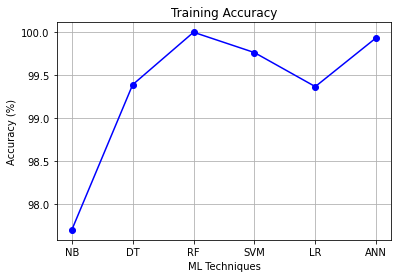

In [42]:
labels = ['NB','DT','RF','SVM','LR','ANN']
values = [NB_Train_score*100,DT_train_score*100,RF_Train_score*100,SVM_Train_score*100,LR_Train_score*100,ANN_training_score*100]


plt.plot(labels, values, color='blue', marker='o')
plt.title('Training Accuracy')
plt.xlabel('ML Techniques')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()



#TESTING ACCURACY

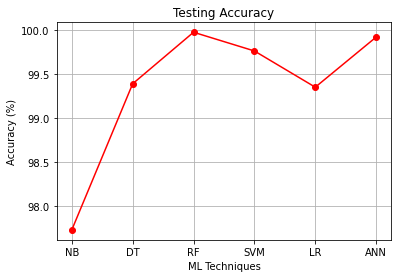

In [43]:
labels = ['NB','DT','RF','SVM','LR','ANN']
values = [NB_Test_score*100,DT_test_score*100,RF_Test_score*100,SVM_Test_score*100,LR_Test_score*100,ANN_testing_score*100]

plt.plot(labels, values, color='red', marker='o')
plt.title('Testing Accuracy')
plt.xlabel('ML Techniques')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()


#TRAINING TIME

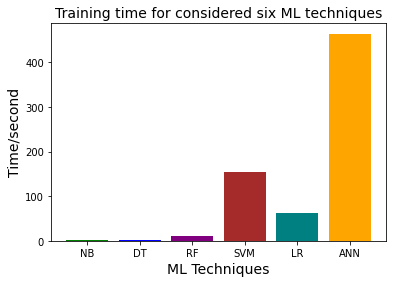

In [44]:
names = ['NB','DT','RF','SVM','LR','ANN']
values = [NB_training_time,DT_training_time,RF_training_time,SVM_training_time,LR_training_time,ANN_training_time]
New_Colors = ['green','blue','purple','brown','teal','Orange']
plt.bar(names, values, color=New_Colors)
plt.title('Training time for considered six ML techniques', fontsize=14)
plt.xlabel('ML Techniques', fontsize=14)
plt.ylabel('Time/second', fontsize=14)
plt.show()



#TESTING TIME

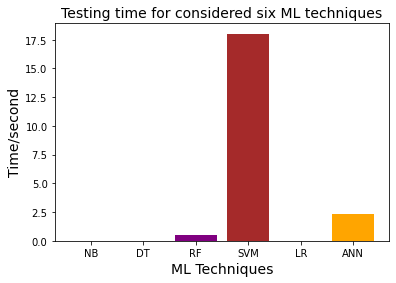

In [45]:
names = ['NB','DT','RF','SVM','LR','ANN']
values = [NB_testing_time,DT_testing_time,RF_testing_time,SVM_testing_time,LR_testing_time,ANN_predict_time]
New_Colors = ['green','blue','purple','brown','teal','Orange']
plt.bar(names, values, color=New_Colors)
plt.title('Testing time for considered six ML techniques', fontsize=14)
plt.xlabel('ML Techniques', fontsize=14)
plt.ylabel('Time/second', fontsize=14)
plt.show()